In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [4]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels','c4','c3']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph'].values

In [7]:
X

array([[1.01453973, 1.03422478],
       [0.99648304, 1.00676816],
       [0.97689244, 0.99996001],
       ...,
       [0.94227888, 0.97475218],
       [1.00002718, 1.0221754 ],
       [0.98602115, 0.99246708]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [69]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
# Create the model
model = KNeighborsRegressor(weights= 'uniform', p = 1, n_neighbors= 7, metric='euclidean')

model.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_test, y_pred_valid)
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)
r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_test, y_pred_valid)

# Print the evaluation metrics and best hyperparameters
print("KNeighborsRegressor_train R^2 score: {:.3f}".format(r2_train))
print("KNeighborsRegressor_valid R^2 score: {:.3f}".format(r2_valid))
print("KNeighborsRegressor_train RMSE score: {:.3f}".format(rmse_train))
print("KNeighborsRegressor_valid RMSE score: {:.3f}".format(rmse_valid))


KNeighborsRegressor_train R^2 score: 0.981
KNeighborsRegressor_valid R^2 score: 0.976
KNeighborsRegressor_train RMSE score: 0.039
KNeighborsRegressor_valid RMSE score: 0.045


{'weights': 'uniform', 'p': 2, 'n_neighbors': 5}

In [70]:
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=7, p=1)

In [11]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming X and y are your data and labels, and clf is your classifier object
kf = KFold(n_splits=5)
y_pred = cross_val_predict(model, X_test, y_test, cv=kf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3719   99    0    0]
 [ 189 3276  236    0]
 [   0  392 3019  308]
 [   0    0  198 3564]]


Text(0.5, 1.0, 'Confusion Matrix ($f_1$)')

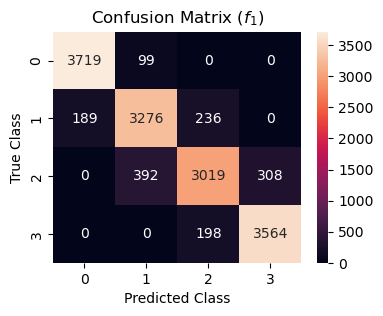

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

plt.figure(figsize=(4,3))

sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix ($f_1$)')

# plt.savefig('con_f1.jpeg',dpi=300)

In [71]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('KNN_2_1_regressor', 'wb') as file:
    pickle.dump(model, file)

In [70]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])